In [1]:
import pandas as pd
train = pd.read_csv("train.csv")

/home/eisti/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def population(x):
    aux = x.split("_");
    return ("male" in aux or "female" in aux)

people = train[filter(population,train.keys())+["price_doc"]]
people.head()

,male_f,female_f,young_male,young_female,work_male,work_female,ekder_male,ekder_female,0_6_male,0_6_female,7_14_male,7_14_female,0_17_male,0_17_female,16_29_male,16_29_female,0_13_male,0_13_female,price_doc
0,40477,45729,11007,10147,52277,45930,10580,25631,4899,4677,5463,4846,12286,11317,9425,8083,9709,8945,5850000
1,34200,42084,7925,7802,35622,34572,9266,20165,3466,3414,3909,3850,8998,8702,7571,7593,6929,6800,6000000
2,46076,55906,6835,6193,31813,31575,7609,17683,3095,2784,3269,2938,7821,7063,9045,10356,5916,5336,5700000
3,9828,11327,14680,13883,60040,60341,9083,20446,6645,6442,7126,6544,16513,15550,1450,1842,12782,12152,13100000
4,13522,14657,7159,6209,34236,33807,8563,18197,2982,2724,3664,3084,8113,7124,2583,2581,6223,5408,16331452


In [3]:
# 0_6  bon  rien à faire
# 7_13 formule=  0_13 - 0_6
# 14_17 bon rien à faire 14_15 +16_17
# 18 -29 formule =  16_29 
#  16_17 forumule 0_17 - 0_15

people["14_17_male"] = people["0_17_male"]- people["0_13_male"]
people["14_17_female"] = people["0_17_female"]- people["0_13_female"]
people.head()

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,male_f,female_f,young_male,young_female,work_male,work_female,ekder_male,ekder_female,0_6_male,0_6_female,...,7_14_female,0_17_male,0_17_female,16_29_male,16_29_female,0_13_male,0_13_female,price_doc,14_17_male,14_17_female
0,40477,45729,11007,10147,52277,45930,10580,25631,4899,4677,...,4846,12286,11317,9425,8083,9709,8945,5850000,2577,2372
1,34200,42084,7925,7802,35622,34572,9266,20165,3466,3414,...,3850,8998,8702,7571,7593,6929,6800,6000000,2069,1902
2,46076,55906,6835,6193,31813,31575,7609,17683,3095,2784,...,2938,7821,7063,9045,10356,5916,5336,5700000,1905,1727
3,9828,11327,14680,13883,60040,60341,9083,20446,6645,6442,...,6544,16513,15550,1450,1842,12782,12152,13100000,3731,3398
4,13522,14657,7159,6209,34236,33807,8563,18197,2982,2724,...,3084,8113,7124,2583,2581,6223,5408,16331452,1890,1716


In [4]:
people["7_13_male"] = people["0_13_male"]- people["0_6_male"]
people["7_13_female"] = people["0_13_female"]- people["0_6_female"]
people.pop("0_13_male") ; people.pop("0_13_female");
people.pop("0_17_male") ; people.pop("0_17_female");
people.pop("7_14_male") ; people.pop("7_14_female");

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
people.keys()

Index([u'male_f', u'female_f', u'young_male', u'young_female', u'work_male',
       u'work_female', u'ekder_male', u'ekder_female', u'0_6_male',
       u'0_6_female', u'16_29_male', u'16_29_female', u'price_doc',
       u'14_17_male', u'14_17_female', u'7_13_male', u'7_13_female'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

people.corr()


,male_f,female_f,young_male,young_female,work_male,work_female,ekder_male,ekder_female,0_6_male,0_6_female,16_29_male,16_29_female,price_doc,14_17_male,14_17_female,7_13_male,7_13_female
male_f,1.000000,0.999282,0.163631,0.164707,0.202736,0.183096,0.279504,0.222023,0.167613,0.165422,0.999215,0.998315,0.026445,0.170484,0.188421,0.160475,0.164112
female_f,0.999282,1.000000,0.163731,0.165069,0.201921,0.182761,0.279396,0.221429,0.167648,0.165627,0.998342,0.999163,0.024286,0.170093,0.187773,0.160702,0.164753
young_male,0.163631,0.163731,1.000000,0.996094,0.951873,0.957080,0.822584,0.871262,0.996748,0.994614,0.160477,0.160685,0.135327,0.988667,0.987750,0.997159,0.987660
young_female,0.164707,0.165069,0.996094,1.000000,0.948751,0.957235,0.825554,0.874830,0.991310,0.995505,0.161975,0.162158,0.137986,0.983756,0.988018,0.994983,0.995271
work_male,0.202736,0.201921,0.951873,0.948751,1.000000,0.989492,0.902157,0.938837,0.948482,0.946303,0.197536,0.197798,0.145476,0.956389,0.955807,0.948000,0.939957
work_female,0.183096,0.182761,0.957080,0.957235,0.989492,1.000000,0.894398,0.934618,0.952971,0.952852,0.178130,0.178989,0.139527,0.958380,0.962341,0.953893,0.950637
ekder_male,0.279504,0.279396,0.822584,0.825554,0.902157,0.894398,1.000000,0.984579,0.811336,0.813206,0.273703,0.273073,0.182465,0.844780,0.851559,0.825193,0.826519
ekder_female,0.222023,0.221429,0.871262,0.874830,0.938837,0.934618,0.984579,1.000000,0.862012,0.864109,0.216351,0.216162,0.168338,0.885182,0.892203,0.872464,0.874428
0_6_male,0.167613,0.167648,0.996748,0.991310,0.948482,0.952971,0.811336,0.862012,1.000000,0.996495,0.165616,0.165054,0.132796,0.981356,0.979844,0.988320,0.976949
0_6_female,0.165422,0.165627,0.994614,0.995505,0.946303,0.952852,0.813206,0.864109,0.996495,1.000000,0.163853,0.163299,0.134940,0.979262,0.980730,0.987230,0.982098


In [15]:
habitant = train[filter(lambda x : "all" in x.split("_"), train.keys())]
habitant.head()

,full_all,young_all,work_all,ekder_all,0_6_all,7_14_all,0_17_all,16_29_all,0_13_all
0,86206,21154,98207,36211,9576,10309,23603,17508,18654
1,76284,15727,70194,29431,6880,7759,17700,15164,13729
2,101982,13028,63388,25292,5879,6207,14884,19401,11252
3,21155,28563,120381,29529,13087,13670,32063,3292,24934
4,28179,13368,68043,26760,5706,6748,15237,5164,11631


In [16]:
habitant.corr()

,full_all,young_all,work_all,ekder_all,0_6_all,7_14_all,0_17_all,16_29_all,0_13_all
full_all,1.000000,0.164469,0.193225,0.240334,0.166804,0.162308,0.168744,0.999370,0.165449
young_all,0.164469,1.000000,0.957181,0.861577,0.996408,0.997057,0.999712,0.161536,0.999885
work_all,0.193225,0.957181,1.000000,0.930402,0.953495,0.953521,0.959452,0.188778,0.956217
ekder_all,0.240334,0.861577,0.930402,1.000000,0.850929,0.863689,0.865881,0.234737,0.859697
0_6_all,0.166804,0.996408,0.953495,0.850929,1.000000,0.987113,0.995870,0.164703,0.996875
7_14_all,0.162308,0.997057,0.953521,0.863689,0.987113,1.000000,0.996861,0.158738,0.996610
0_17_all,0.168744,0.999712,0.959452,0.865881,0.995870,0.996861,1.000000,0.165666,0.999445
16_29_all,0.999370,0.161536,0.188778,0.234737,0.164703,0.158738,0.165666,1.000000,0.162658
0_13_all,0.165449,0.999885,0.956217,0.859697,0.996875,0.996610,0.999445,0.162658,1.000000


In [17]:
habitant["7_13_all"] = habitant["0_13_all"]- habitant["0_6_all"]
habitant["14_17_all"] = habitant["0_17_all"]- habitant["0_13_all"]
habitant.pop("0_13_all") ; 
habitant.pop("0_17_all") ; 
habitant.pop("7_14_all") ; 

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
habitant.corr()

,full_all,young_all,work_all,ekder_all,0_6_all,16_29_all,7_13_all,14_17_all
full_all,1.000000,0.164469,0.193225,0.240334,0.166804,0.999370,0.162791,0.179248
young_all,0.164469,1.000000,0.957181,0.861577,0.996408,0.161536,0.996549,0.989503
work_all,0.193225,0.957181,1.000000,0.930402,0.953495,0.188778,0.952369,0.962162
ekder_all,0.240334,0.861577,0.930402,1.000000,0.850929,0.234737,0.863133,0.880337
0_6_all,0.166804,0.996408,0.953495,0.850929,1.000000,0.164703,0.986359,0.982636
16_29_all,0.999370,0.161536,0.188778,0.234737,0.164703,1.000000,0.159267,0.175146
7_13_all,0.162791,0.996549,0.952369,0.863133,0.986359,0.159267,1.000000,0.986459
14_17_all,0.179248,0.989503,0.962162,0.880337,0.982636,0.175146,0.986459,1.000000


In [21]:
habitant1 = habitant[[u"full_all",u"young_all",u"work_all",u"ekder_all"]]
habitant1.corr()

,full_all,young_all,work_all,ekder_all
full_all,1.000000,0.164469,0.193225,0.240334
young_all,0.164469,1.000000,0.957181,0.861577
work_all,0.193225,0.957181,1.000000,0.930402
ekder_all,0.240334,0.861577,0.930402,1.000000


In [22]:
distance = train[filter(lambda x: x.split("_")[-1]=="km", train.keys())]
distance.head()

,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_km,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km
0,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,5.419893,...,0.637189,0.947962,0.177975,0.625783,0.628187,3.932040,14.053047,7.389498,7.023705,0.516838
1,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,3.641773,...,0.688796,1.072315,0.273345,0.967821,0.471447,4.841544,6.829889,0.709260,2.358840,0.230287
2,0.049102,0.158072,0.374848,0.453172,0.939275,4.912660,3.381083,11.996480,1.277658,1.277658,...,1.543049,0.391957,0.158072,3.178751,0.755946,7.922152,4.273200,3.156423,4.958214,0.190462
3,0.179441,0.236455,0.078090,0.106125,0.451173,15.623710,2.017080,14.317640,4.291432,3.816045,...,0.934273,0.892674,0.236455,1.031777,1.561505,15.300449,16.990677,16.041521,5.029696,0.465820
4,0.247901,0.376838,0.258289,0.236214,0.392871,10.683540,2.936581,11.903910,0.853960,1.595898,...,0.077901,0.810801,0.376838,0.378756,0.121681,2.584370,1.112486,1.800125,1.339652,0.026102


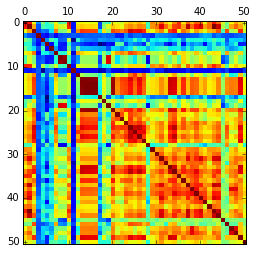

In [25]:
plt.figure(figsize= (16,16))
plt.matshow(distance.corr())
plt.show()

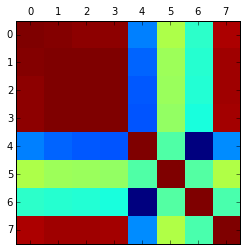

In [33]:
plt.matshow(distance.corr().iloc[13:21,13:21])

In [34]:
distance.corr().iloc[13:21,13:21]
"sadovoe_km","bulvar_ring_km",""

,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km
ttk_km,1.000000,0.992477,0.987004,0.984562,0.252890,0.560681,0.406990,0.959727
sadovoe_km,0.992477,1.000000,0.998443,0.997456,0.227080,0.543449,0.397126,0.969800
bulvar_ring_km,0.987004,0.998443,1.000000,0.998804,0.216921,0.538987,0.395364,0.970654
kremlin_km,0.984562,0.997456,0.998804,1.000000,0.209884,0.529792,0.382257,0.965716
big_road1_km,0.252890,0.227080,0.216921,0.209884,1.000000,0.448903,0.003233,0.265185
big_road2_km,0.560681,0.543449,0.538987,0.529792,0.448903,1.000000,0.452117,0.565361
railroad_km,0.406990,0.397126,0.395364,0.382257,0.003233,0.452117,1.000000,0.441031
zd_vokzaly_avto_km,0.959727,0.969800,0.970654,0.965716,0.265185,0.565361,0.441031,1.000000
